In [19]:
import os
import copy
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io
import matplotlib.pyplot as plt
import glob
import re
from datetime import datetime
from dateutil import parser
import dateutil.parser
from scipy.io import savemat

import numpy as np
import scipy.misc
import numpy.random as rng
from PIL import Image, ImageDraw, ImageFont
from sklearn.utils import shuffle
import nibabel as nib #reading MR images
import math
from matplotlib import pyplot as plt

In [20]:
import shap
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

### Classification

In [20]:
DATASET = 'Dataset_Ciaran_McEvoy.csv'
dataset = pd.read_csv(DATASET)

dataset.replace('M', 1, inplace=True)
dataset.replace('F', 0, inplace=True)
X = dataset.drop(columns=['VISCODE','VISCODE2', 'Group', 'MRI_Date', 'Exam_Date'])
y = dataset['Group']

iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(float)  # Cast labels to float

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

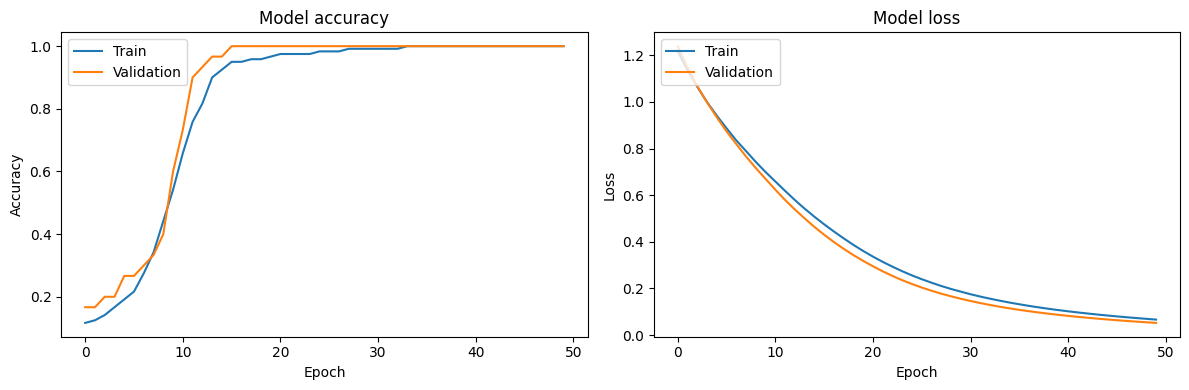

1/1 [==============================] - 0s 27ms/step
Real vs Predicted Values:
[[0.         0.0603063 ]
 [1.         0.93946975]
 [0.         0.00149033]]


In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the MLP model
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer with 8 neurons and ReLU activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_data=(X_test_scaled, y_test), verbose=0)

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

predictions = model.predict(X_test_scaled)

# Flatten the predictions and true values arrays for easier comparison
predictions = predictions.flatten()

# Display real and predicted values
result = np.column_stack((y_test[:3], predictions[:3]))
print("Real vs Predicted Values:")
print(result)

### Regression

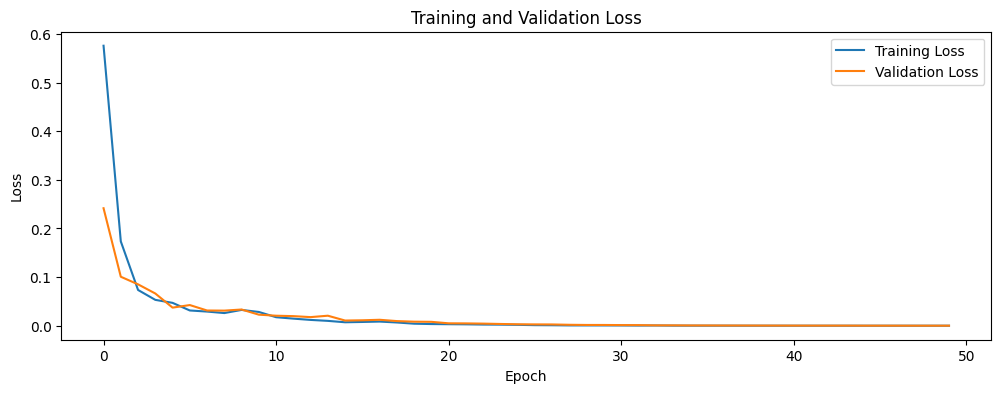

16/16 [==============================] - 0s 600us/step - loss: 6.3322e-05
Mean Squared Error on Test Set: 0.0001
16/16 [==============================] - 0s 534us/step


Using 2040 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Real vs Predicted Values:
[[0.00156721 0.0018708 ]
 [0.00144    0.00350399]
 [0.00221644 0.00193083]
 [0.00224796 0.01462998]
 [0.00158928 0.00485359]]
Mean Percentage Error on Test Set: 242.8017%


  0%|          | 0/510 [00:00<?, ?it/s]

MemoryError: Unable to allocate 42.9 GiB for an array with shape (7364400, 781) and data type float64

In [27]:
DATASET = 'Dataset3.0.csv'
dataset = pd.read_csv(DATASET)
dataset['Sex'] = dataset['Sex'].replace({'M': 1, 'F': 0})
lipids_only = dataset.iloc[:, 54:837]
columns_to_drop = ['LHC_ICV', 'RHC_ICV']
X = lipids_only.drop(columns=columns_to_drop, axis=1)
y = lipids_only['LHC_ICV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the MLP regression model
model = Sequential()
model.add(Dense(8, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))  # Use linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Use mean squared error loss for regression

# Train the model
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_data=(X_test_scaled, y_test), verbose=0)

# Plot training history
plt.figure(figsize=(12, 4))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
mse = model.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error on Test Set: {mse:.4f}")

predictions = model.predict(X_test_scaled)

# Flatten the predictions and true values arrays for easier comparison
predictions = predictions.flatten()

# Display real and predicted values
result = np.column_stack((y_test[:5], predictions[:5]))
print("Real vs Predicted Values:")
print(result)

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

mape = MAPE(y_test, predictions)
print(f"Mean Percentage Error on Test Set: {mape:.4f}%")

# # Create a KernelExplainer with your model
# explainer = shap.KernelExplainer(model, data=X_train_scaled)  # Using a subset of the data for speed, adjust as needed

# # Calculate SHAP values for the test set
# shap_values = explainer.shap_values(X_test_scaled)

# shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)
# # Summary plot with only top 5 features
# shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, plot_type="bar", max_display=5)